<a href="https://colab.research.google.com/github/MainakRepositor/ML-Algorithms/blob/master/Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE REGRESSION

## Multi-variate regression or multiple linear regression is a Machine Learning model, which is made to find relation between multiple independent variables and thus, determine the values of a dependent variable. In linear regression, there was only one coefficient, as there was a single independent variable. But in multiple linear regression, there are infact, multiple coefficients for multiple variables as the equation below will demonstrate.


## Mathematical Notation :
<img src="https://miro.medium.com/max/1662/1*39FkA9sgT6E_txFT_KANjw.png">

## Unlike simple linear regression, a multiple linear regression or multivariate regression has more than one slopes, depending upon the number of independent parameters. But for all of them, we use only y axis when all xs depend on y individually

<img src="https://www.researchgate.net/profile/Mark_Vandam/publication/270961898/figure/fig1/AS:267470841839624@1440781426132/Multiple-linear-regression-MLR-model-predictions-for-individual-observations-ie.png" width=60%>

## Building model through codes

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print("All packages installed successfully!")

All packages installed successfully!


## 2. Importing the datasets

In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/House%20rent.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head(10)

,Area,Bedrooms,Age,Rent
0,1024,3.0,15,11200
1,1200,4.0,10,33650
2,800,2.0,5,8000
3,674,2.0,10,6120
4,766,2.0,11,6000
5,680,NaN,36,3200
6,750,NaN,10,3500
7,900,3.0,20,3345
8,967,3.0,23,3100
9,720,3.0,7,6200


## 3. Exploring data

### Shape of the dataframe in the form of (rows,columns)

In [3]:
df.shape

(40, 4)

### Check for missing values

In [4]:
print("Are there null values ?",df.isnull().values.any())

Are there null values ? True


### Column-wise count of missing values

In [5]:
df.isnull().sum()

Area        0
Bedrooms    4
Age         0
Rent        0
dtype: int64

### Replacing null values with median

In [6]:
median = df.Bedrooms.median()
median

3.0

In [7]:
df.Bedrooms = df.Bedrooms.fillna(int(median))
print("Dataframe after replacing the null values :\n")
df

Dataframe after replacing the null values :



,Area,Bedrooms,Age,Rent
0,1024,3.0,15,11200
1,1200,4.0,10,33650
2,800,2.0,5,8000
3,674,2.0,10,6120
4,766,2.0,11,6000
5,680,3.0,36,3200
6,750,3.0,10,3500
7,900,3.0,20,3345
8,967,3.0,23,3100
9,720,3.0,7,6200


## 4. Building the machine learning model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg = LinearRegression()

In [9]:
reg.fit(df[['Area','Bedrooms','Age']],df.Rent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
reg.coef_

array([  34.66745591, 2440.61024394, -354.75983519])

In [11]:
reg.intercept_

-24001.729279468836

### Predicted result

In [12]:
reg.predict([[920,3,10]])

array([11666.56253816])

### Actual result

In [13]:
y = 34.66745591*920+2440.61024394*3+-354.75983519*10+-24001.729279468844
y

11666.562537651156

In [14]:
r = 100 - (y-reg.predict([[920,3,10]]))
print("Accuracy of model = ",int(r),"%")

Accuracy of model =  100 %


In [15]:
x = df.iloc[:,0].values.reshape(-1,1)
x1 = df.iloc[:,1].values.reshape(-1,1)
x2 = df.iloc[:,2].values.reshape(-1,1)
y = df.iloc[:,-1].values

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/4,random_state=0)
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=1/4,random_state=0)
x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=1/4,random_state=0)

In [17]:
reg.fit(x_train,y_train)
reg.fit(x1_train,y_train)
reg.fit(x2_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = reg.predict(x_test)
y_pred = reg.predict(x1_test)
y_pred = reg.predict(x2_test)

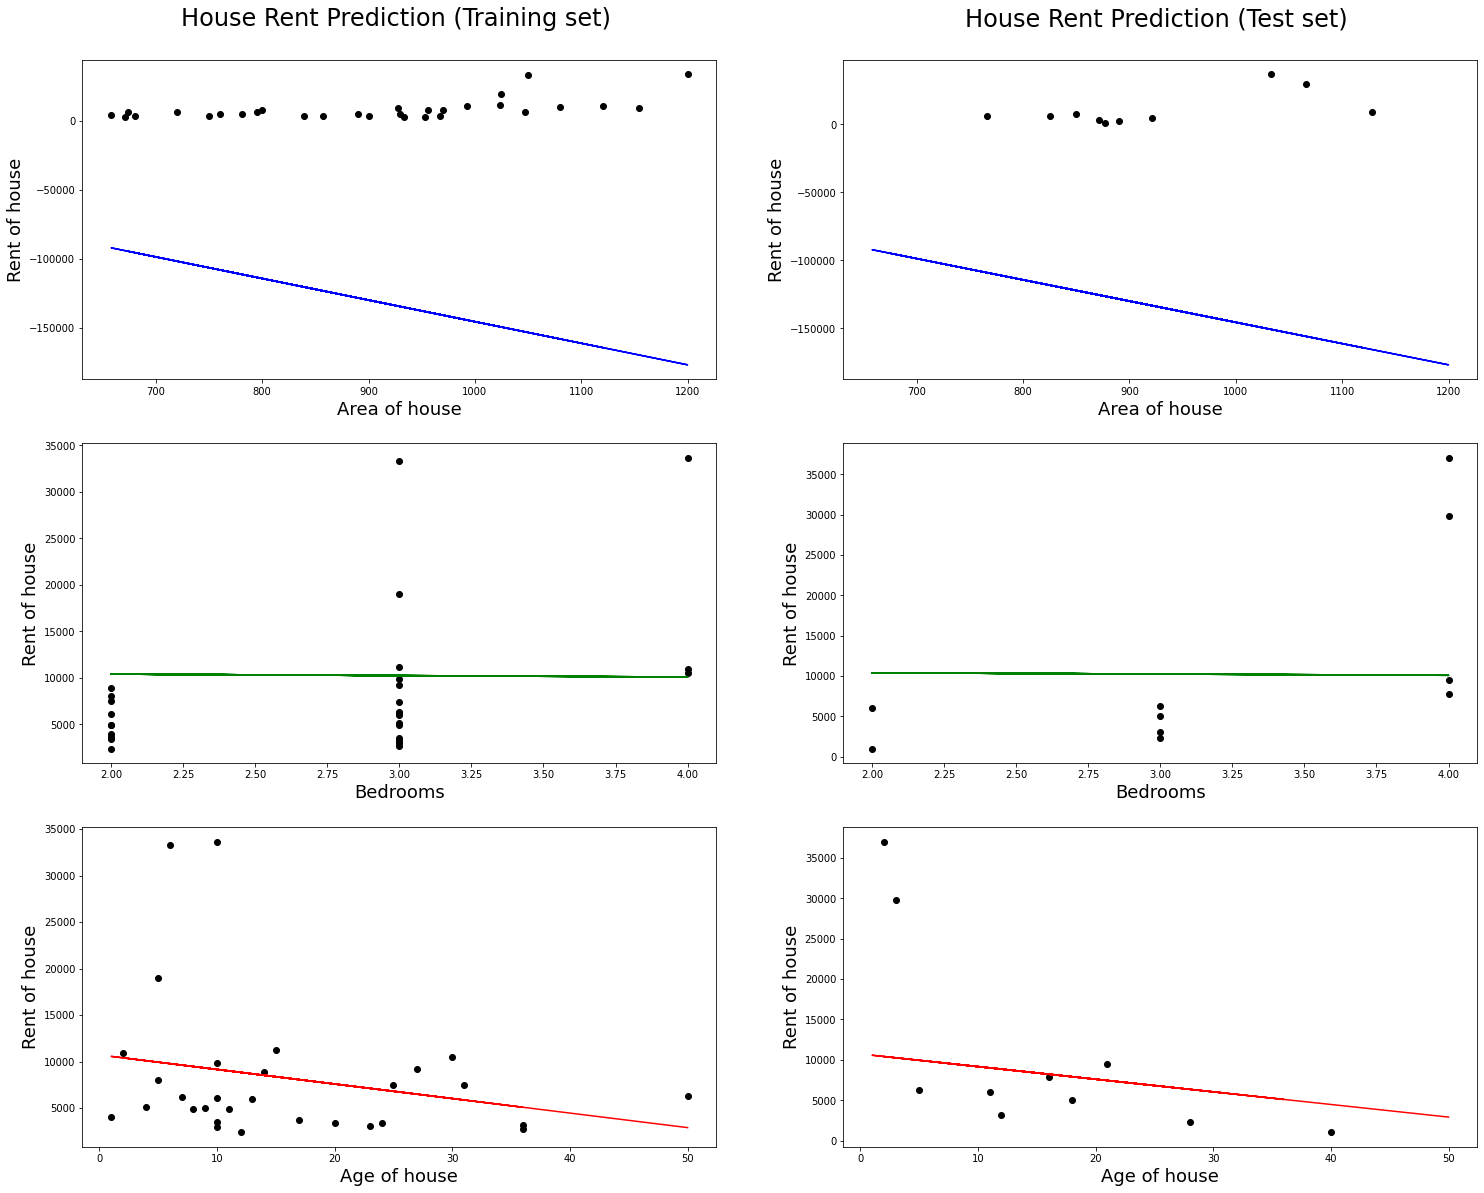

In [19]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
plt.scatter(x_train,y_train,c='k')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.xlabel('Area of house',size=18)
plt.ylabel('Rent of house',size=18)
plt.title('House Rent Prediction (Training set) \n',size=24)

plt.subplot(3,2,2)
plt.scatter(x_test,y_test,c='k')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.xlabel('Area of house',size=18)
plt.ylabel('Rent of house',size=18)
plt.title('House Rent Prediction (Test set) \n',size=24)

plt.subplot(3,2,3)
plt.scatter(x1_train,y_train,c='k')
plt.plot(x1_train,reg.predict(x1_train),color='green')
plt.xlabel('Bedrooms',size=18)
plt.ylabel('Rent of house',size=18)

plt.subplot(3,2,4)
plt.scatter(x1_test,y_test,c='k')
plt.plot(x1_train,reg.predict(x1_train),color='green')
plt.xlabel('Bedrooms',size=18)
plt.ylabel('Rent of house',size=18)

plt.subplot(3,2,5)
plt.scatter(x2_train,y_train,c='k')
plt.plot(x2_train,reg.predict(x2_train),color='red')
plt.xlabel('Age of house',size=18)
plt.ylabel('Rent of house',size=18)

plt.subplot(3,2,6)
plt.scatter(x2_test,y_test,c='k')
plt.plot(x2_train,reg.predict(x2_train),color='red')
plt.xlabel('Age of house',size=18)
plt.ylabel('Rent of house',size=18)

plt.show()

## In this exercise, we have got a large negative intercept. As the coefficient of house area is quite small, hence the slope is tending towards the negative direction, resulting in production of a negative scale of values.

### From the graphs, we can also say that the house rent mostly depends on the age of the house and has almost linearly decreasing relation with age of house. This suggests as the age of house increases, its cost decreases

## Pros and Cons of Multivariate Regression

## Pros or Advantages
### 1.Multiple factors can be fed into the model and analysed in one go
### 2.Works quite fast with most datasets
### 3.More realistic than linear regression
<hr>


## Cons or Disadvantages
### 1.If there is a heirarchical dependence for more than 2 independent parameters, like x depends on y and y depends on z, then it would be difficult to plot such values and demonstrate regressions in a single plot.
### 2.Not suitable for very big datasets of size 10 million or more
### 3.Like linear regression, it cannot predict special mathematical patterns
